<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter01/Learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

In [2]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [3]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0):
                print('weight value:', np.round(original_weights[i][index],2), 
                      'original loss:', np.round(org_loss,2), 
                      'loss_plus:', np.round(_loss_plus,2), 
                      'gradient:', np.round(grad,2), 
                      'updated_weights:', np.round(updated_weights[i][index],2))
    return updated_weights,org_loss

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 0.45
weight value: 0.45 original loss: 46.88 loss_plus: 46.88 gradient: -37.49 updated_weights: 0.82
weight value: 0.82 original loss: 32.57 loss_plus: 32.57 gradient: -31.26 updated_weights: 1.14
weight value: 1.14 original loss: 22.64 loss_plus: 22.64 gradient: -26.05 updated_weights: 1.4
weight value: 1.4 original loss: 15.75 loss_plus: 15.75 gradient: -21.72 updated_weights: 1.62
weight value: 1.62 original loss: 10.97 loss_plus: 10.97 gradient: -18.1 updated_weights: 1.8
weight value: 1.8 original loss: 7.65 loss_plus: 7.65 gradient: -15.09 updated_weights: 1.95
weight value: 1.95 original loss: 5.35 loss_plus: 5.35 gradient: -12.59 updated_weights: 2.07
weight value: 2.07 original loss: 3.75 loss_plus: 3.75 gradient: -10.49 updated_weights: 2.18
weight value: 2.18 original loss: 2.64 loss_plus: 2.64 gradient: -8.75 updated_weights: 2.27
[array([[2.265477]], dtype=float32), array([[0.7404298]], 

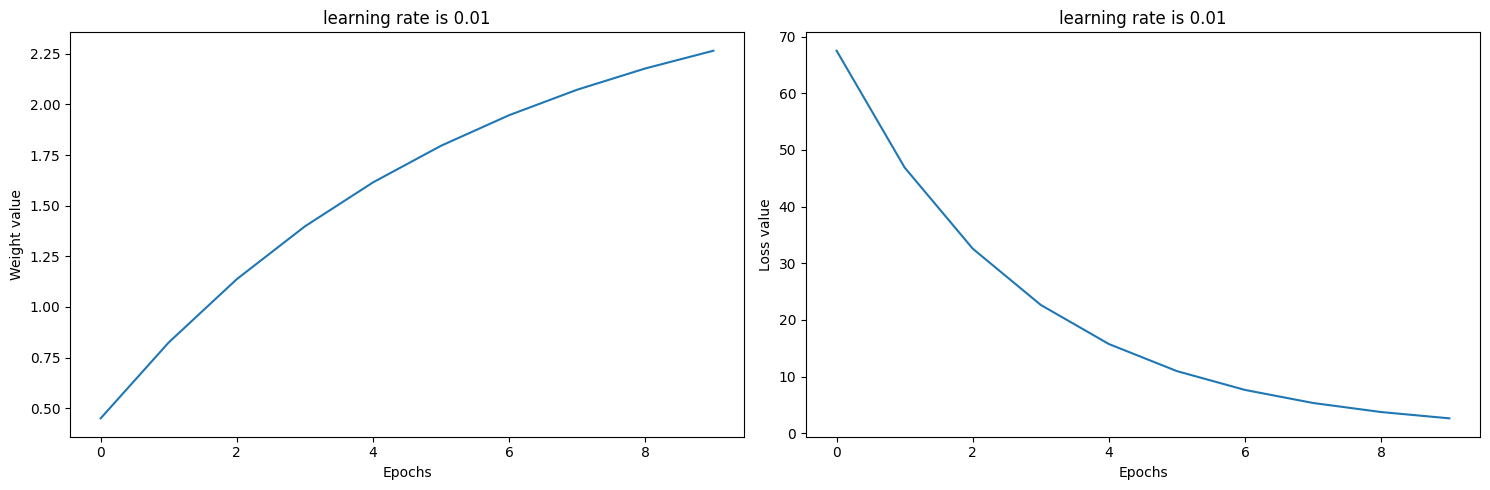

In [15]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
loss_value=[]

#调整lr和epoch，观察下面的weight和loss的变化

lr,epoch=0.01,10
# lr,epoch=0.01,100
# lr,epoch=0.01,1200
# lr,epoch=0.1,10
# lr,epoch=1,10
for epx in range(epoch):
    W,loss = update_weights(x,y,W,lr)
    weight_value.append(W[0][0][0])
    loss_value.append(loss)
print(W)
print(loss_value)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(weight_value[:100])
plt.title(f'learning rate is {lr}')
plt.xlabel('Epochs')
plt.ylabel('Weight value')
plt.subplot(1,2,2)
plt.plot(loss_value[:100])
plt.title(f'learning rate is {lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.tight_layout()
plt.show()